Here we are going to build a TRB model in python. All data comes from open rocket file with TRB and thrust curves from the onedrive and the technical report for far-out 2025. The task won't be easy, that's what I assume, nevertheless it is the opportunity to learn a lot about rocket science. Let's begin by some time estimations of the work that is to be done. 

In [3]:
from rocketpy import Environment, LiquidMotor, Rocket, Flight

In [4]:
env = Environment(latitude=35.35, longitude=117.81, elevation=609.6)

In [5]:
import datetime

today = datetime.date.today()

env.set_date(
    (today.year, today.month, today.day, 12)
)  # Hour given in UTC time

In [6]:
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of gravity at surface level:    9.7970 m/s²
Acceleration of gravity at  79.115 km (ASL): 9.5580 m/s²


Launch Site Details

Launch Date: 2025-12-08 12:00:00 UTC
Launch Site Latitude: 35.35000°
Launch Site Longitude: 117.81000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 573598.55 E    3912158.86 N
Launch Site UTM zone: 50S
Launch Site Surface Elevation: 216.9 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.115 km
Forecast Time Period: from 2025-12-08 00:00:00 to 2025-12-24 00:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 1.77 m/s
Surface Wind Direction: 159.75°
Surface Wind Heading: 339.75°
Surface Pressure: 1000.00 hPa
Surface Temperature: 278.82 K
Surface Air Density: 1.249 kg/m³
Surface Speed of Sound: 334.74 m/s


Earth Model Details

Earth Radius at Launch 

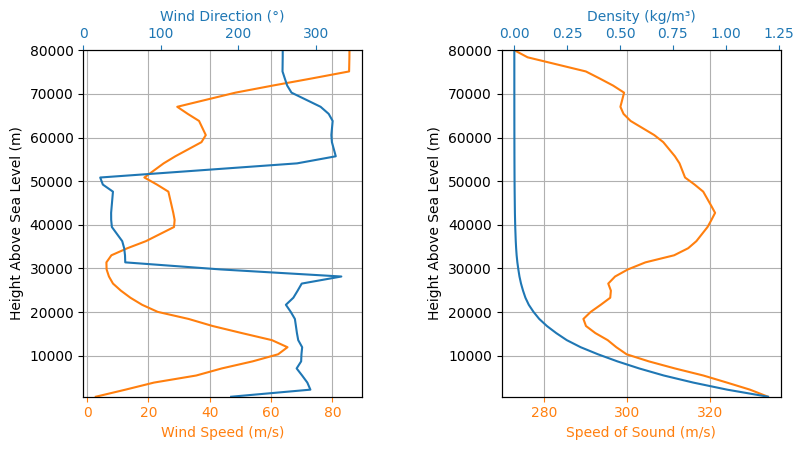

In [7]:
env.info()

In [8]:
from rocketpy import Fluid, LiquidMotor, CylindricalTank, MassFlowRateBasedTank

In [ ]:
# Define fluids
oxidizer_liq = Fluid(name="N2O_l", density=1220)
oxidizer_gas = Fluid(name="N2O_g", density=1.9277)
fuel_liq = Fluid(name="ethanol_l", density=789)
fuel_gas = Fluid(name="ethanol_g", density=1.59)

# Define tanks geometry
tanks_shape = CylindricalTank(radius = 0.055, height = 0.27, spherical_caps = False)

# Define tanks
oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer tank",
    geometry=tanks_shape,
    flux_time=14.4,
    initial_liquid_mass=32,
    initial_gas_mass=0.01,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=lambda t: 32 / 3 * exp(-0.25 * t),
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=oxidizer_liq,
    gas=oxidizer_gas,
)

fuel_tank = MassFlowRateBasedTank(
    name="fuel tank",
    geometry=tanks_shape,
    flux_time=5,
    initial_liquid_mass=21,
    initial_gas_mass=0.01,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=lambda t: 21 / 3 * exp(-0.25 * t),
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=lambda t: 0.01 / 3 * exp(-0.25 * t),
    liquid=fuel_liq,
    gas=fuel_gas,
)